In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
df_feat=pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_target=pd.DataFrame(cancer['target'], columns=['Cancer'])

print('Feature Variables:')
print(df_feat.info())

Feature Variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothn

In [ ]:
print('Target Variable:')
print(df_target.info())

Target Variable:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Cancer  569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB
None


In [ ]:
print('Dataframe looks like:')
print(df_feat.head())

Dataframe looks like:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst per

In [ ]:
print('Target looks like:')
print(df_target.head())

Target looks like:
   Cancer
0       0
1       0
2       0
3       0
4       0


In [ ]:
#Assignment

In [ ]:
#Implement SVM with Default Hyperparameter

In [3]:
X=cancer.data
y=cancer.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [5]:
from sklearn.svm import SVC
classifier=SVC(verbose=2, random_state=0)

In [6]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(random_state=0, verbose=2)

In [ ]:
#Answer

In [7]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.9064327485380117


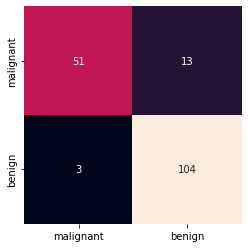

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx=confusion_matrix(y_test, y_pred)
df_cmx=pd.DataFrame(cmx, index=cancer.target_names, columns=cancer.target_names)
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt='d')

In [ ]:
#Implement SVM with Tunned Hyperparameter

In [9]:
X=cancer.data
y=cancer.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [11]:
tuned_parameters=[{'kernel':['rbf'], 'gamma':[1e-3, 1e-4], 'C':[1, 10, 100, 1000]},
                  {'kernel':['linear'], 'C':[1, 10, 100, 1000]},
                  {'kernel':['poly'], 'degree':[1, 2, 3], 'C':[1, 10, 100, 1000]}]

In [12]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(SVC(), tuned_parameters, refit=True, cv=3, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'degree': [1, 2, 3],
                          'kernel': ['poly']}],
             verbose=2)

In [13]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


In [14]:
#Answer

In [15]:
from sklearn.metrics import accuracy_score

y_pred=grid.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.9532163742690059


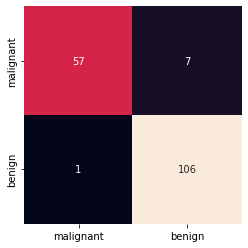

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx=confusion_matrix(y_test, y_pred)
df_cmx=pd.DataFrame(cmx, index=cancer.target_names, columns=cancer.target_names)
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt='d')